In [129]:
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pycaret.regression import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [130]:
df = pd.read_excel('Largest Companies in the World.xlsx')
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [131]:
df.shape

(1924, 10)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [133]:
df.isnull().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

In [134]:
df.isna().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

In [135]:
df1 = df.copy()

In [136]:
s = setup(df1, target = df1['Market Value ($billion)'], session_id = 123)

,Description,Value
0,Session id,123
1,Target,Market Value ($billion)_y
2,Target type,Regression
3,Original data shape,"(1924, 11)"
4,Transformed data shape,"(1924, 16)"
5,Transformed train set shape,"(1346, 16)"
6,Transformed test set shape,"(578, 16)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


In [137]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0190,0.0016,0.0374,1.0000,0.0026,0.0025,0.0310
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0310
llar,Lasso Least Angle Regression,0.0190,0.0016,0.0375,1.0000,0.0026,0.0026,0.0310
en,Elastic Net,0.0206,0.0018,0.0396,1.0000,0.0030,0.0028,0.0300
huber,Huber Regressor,0.1941,0.1077,0.3093,0.9999,0.0399,0.0353,0.0320
par,Passive Aggressive Regressor,0.2922,0.1770,0.3789,0.9998,0.0661,0.0746,0.0310
ridge,Ridge Regression,0.2765,0.2729,0.5085,0.9997,0.0501,0.0568,0.0300
br,Bayesian Ridge,0.2526,0.2493,0.4609,0.9997,0.0460,0.0529,0.0290
lr,Linear Regression,0.2764,0.2729,0.5085,0.9997,0.0501,0.0568,0.2300
knn,K Neighbors Regressor,6.1939,207.3462,13.8131,0.7783,0.4651,0.6982,0.0300


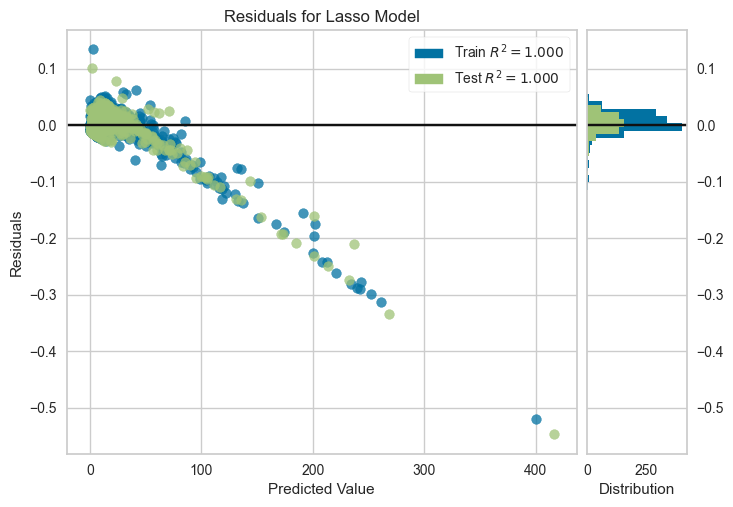

In [138]:
# plot residuals
plot_model(best, plot = 'residuals')

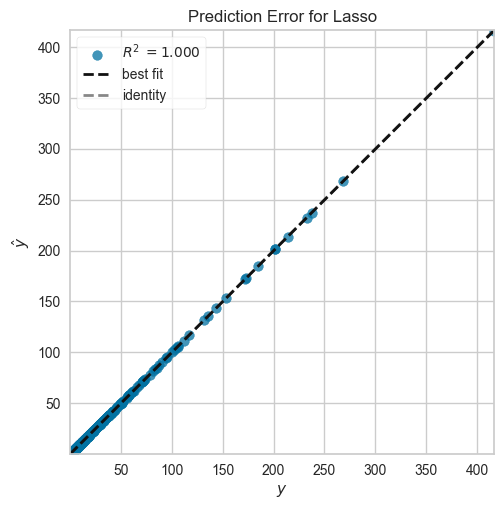

In [139]:
# plot error
plot_model(best, plot = 'error')

# Prediction

In [140]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.0204,0.0019,0.0441,1.0000,0.0028,0.0021


In [141]:
# show predictions df2
holdout_pred.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion)_x,Country,Continent,Latitude,Longitude,Market Value ($billion)_y,prediction_label
1058,1099,Intuit,4.200000,0.8,5.100000,19.400000,USA,North America,37.090240,-95.712891,19.400000,19.393616
437,457,Praxair,11.200000,1.7,18.100000,33.599998,USA,North America,37.090240,-95.712891,33.599998,33.596871
1149,1191,Greentown China Holdings,5.600000,0.8,17.299999,3.200000,China,Asia,35.861660,104.195396,3.200000,3.214441
546,567,Quanta Computer,34.400002,0.8,24.600000,8.500000,Taiwan,Asia,23.697809,120.960518,8.500000,8.530010
657,682,NKSJ Holdings,30.900000,-1.1,105.199997,9.400000,Japan,Asia,36.204823,138.252930,9.400000,9.426600


Hyperparameter Tuning of best model from pycaret module

In [142]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0208,0.0018,0.0419,1.0000,0.0020,0.0017
1,0.0201,0.0011,0.0336,1.0000,0.0022,0.0023
2,0.0144,0.0005,0.0227,1.0000,0.0020,0.0021
3,0.0296,0.0055,0.0743,1.0000,0.0023,0.0023
4,0.0150,0.0006,0.0244,1.0000,0.0021,0.0021
5,0.0170,0.0010,0.0321,1.0000,0.0045,0.0026
6,0.0172,0.0011,0.0325,1.0000,0.0042,0.0063
7,0.0183,0.0012,0.0351,1.0000,0.0025,0.0021
8,0.0175,0.0012,0.0341,1.0000,0.0020,0.0020


In [143]:
# tune hyperparameters of lasso
tuned_lasso = tune_model(lasso)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:45:41
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0005,0.0226,1.0000,0.0011,0.0009
1,0.0107,0.0003,0.0180,1.0000,0.0012,0.0012
2,0.0077,0.0001,0.0122,1.0000,0.0011,0.0011
3,0.0159,0.0016,0.0400,1.0000,0.0012,0.0012
4,0.0081,0.0002,0.0132,1.0000,0.0012,0.0011
5,0.0091,0.0003,0.0173,1.0000,0.0024,0.0014
6,0.0092,0.0003,0.0175,1.0000,0.0023,0.0034
7,0.0098,0.0004,0.0189,1.0000,0.0013,0.0011
8,0.0095,0.0003,0.0184,1.0000,0.0011,0.0011


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [144]:
# to access the tuner object you can set return_tuner = True
tuned_lasso, tuner = tune_model(lasso, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0005,0.0226,1.0000,0.0011,0.0009
1,0.0107,0.0003,0.0180,1.0000,0.0012,0.0012
2,0.0077,0.0001,0.0122,1.0000,0.0011,0.0011
3,0.0159,0.0016,0.0400,1.0000,0.0012,0.0012
4,0.0081,0.0002,0.0132,1.0000,0.0012,0.0011
5,0.0091,0.0003,0.0173,1.0000,0.0024,0.0014
6,0.0092,0.0003,0.0175,1.0000,0.0023,0.0034
7,0.0098,0.0004,0.0189,1.0000,0.0013,0.0011
8,0.0095,0.0003,0.0184,1.0000,0.0011,0.0011


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [145]:
# model object
tuned_lasso

Lasso(random_state=123)

# Testing

In [146]:
def preprocess(df):
    
    df2 = df.copy()
    
    # Drop unused columns
    df2 = df2.drop(['Global Rank', 'Country','Continent','Latitude','Longitude',], axis=1)
    
    # One-hot encode Categorical feature columns
    le = LabelEncoder()
    df2['Company'] = le.fit_transform(df['Company'])
    
    # Split df into X and y
    y = df2['Market Value ($billion)']
    X = df2.drop('Market Value ($billion)', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess(df)



In [147]:
model_lasso = Lasso(random_state=123)
model_lasso.fit(X_train,y_train)
pred_lasso = model_lasso.predict(X_test)

In [148]:
model_compare_lasso = pd.DataFrame({'y_test': y_test, 'lasso_pred': pred_lasso})
model_compare_lasso

,y_test,lasso_pred
48,87.2,67.499993
1279,11.5,11.489442
1159,4.7,10.205039
1089,10.2,15.323810
309,10.2,33.805206
...,...,...
654,13.6,18.239532
1318,0.9,10.788069
142,58.0,54.354757
1693,1.0,10.454265


Lasso model does not have high accuracy. Therefore, i will test score against other models using manual techniques.

In [149]:
#Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
pred_model_lr = model_lr.predict(X_test)
R2_lr = model_lr.score(X_test,y_test)
rmse_lr = np.sqrt(np.mean((y_test - pred_model_lr)**2))

#Ridge"
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
pred_model_ridge = model_ridge.predict(X_test)
R2_ridge = model_ridge.score(X_test,y_test)
rmse_ridge = np.sqrt(np.mean((y_test - pred_model_ridge)**2))


#Lasso
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
pred_model_lasso = model_lasso.predict(X_test)
R2_lasso = model_lasso.score(X_test,y_test)
rmse_lasso = np.sqrt(np.mean((y_test - pred_model_lasso)**2))

#Least Angle Regression
model_lars = Lars(n_nonzero_coefs=1)
model_lars.fit(X_train,y_train)
pred_model_lars = model_lars.predict(X_test)
R2_lars = model_lars.score(X_test,y_test)
rmse_lars = np.sqrt(np.mean((y_test - pred_model_lars)**2))

#K-Nearest Neighbors
model_knn = KNeighborsRegressor()
model_knn.fit(X_train,y_train)
pred_model_knn = model_knn.predict(X_test)
R2_knn = model_knn.score(X_test,y_test)
rmse_knn = np.sqrt(np.mean((y_test - pred_model_knn)**2))

#Neural Network
model_nn = MLPRegressor()
model_nn.fit(X_train,y_train)
pred_model_nn = model_nn.predict(X_test)
R2_nn = model_nn.score(X_test,y_test)
rmse_nn = np.sqrt(np.mean((y_test - pred_model_nn)**2))

#Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
pred_model_dt = model_dt.predict(X_test)
R2_dt = model_dt.score(X_test,y_test)
rmse_dt = np.sqrt(np.mean((y_test - pred_model_dt)**2))

#Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
pred_model_rf = model_rf.predict(X_test)
R2_rf = model_rf.score(X_test,y_test)
rmse_rf = np.sqrt(np.mean((y_test - pred_model_rf)**2))

#Gradient Boosting

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train,y_train)
pred_model_gbr = model_gbr.predict(X_test)
R2_gbr = model_gbr.score(X_test,y_test)
rmse_gbr = np.sqrt(np.mean((y_test - pred_model_gbr)**2))

In [150]:
Model_score = pd.DataFrame({'Model': [
    "LinearRegression",
    "Ridge",
    "Lasso",
    "Lars",   
    "KNeighborsRegressor",
    "Neural Network",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting"
]
,'Acronym':[model_lr,model_ridge,model_lasso,model_lars,model_knn,model_nn,model_dt,model_rf,model_gbr
    
]
,'R2':[R2_lr,R2_ridge,R2_lasso,R2_lars,R2_knn,R2_nn,R2_dt,R2_rf,R2_gbr
       ]
,'rmse': [rmse_lr,rmse_ridge,rmse_lasso,rmse_lars,rmse_knn,rmse_nn,rmse_dt,rmse_rf,rmse_gbr
    ]}).sort_values(by=['R2','rmse'],ascending=[False,True]).reset_index()

Model_score

,index,Model,Acronym,R2,rmse
0,5,Neural Network,MLPRegressor(),0.637208,20.057709
1,2,Lasso,Lasso(),0.627893,20.313576
2,1,Ridge,Ridge(),0.626405,20.354165
3,0,LinearRegression,LinearRegression(),0.626397,20.354387
4,7,Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",0.617541,20.594215
5,8,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.608583,20.834002
6,6,Decision Tree,DecisionTreeRegressor(),0.391486,25.976941
7,4,KNeighborsRegressor,KNeighborsRegressor(),0.305810,27.745455
8,3,Lars,Lars(n_nonzero_coefs=1),0.164268,30.442907


In [151]:
best_model = Model_score['Acronym'][0]
print("The bestmodel as per the scores is " + str(best_model) + '.')
pred_values = best_model.predict(X_test)

The bestmodel as per the scores is MLPRegressor().


Comparing against target data.

In [152]:
model_compare_pred = pd.DataFrame({'y_test': y_test, 'Prediction values': pred_values})
model_compare_pred

,y_test,Prediction values
48,87.2,66.661796
1279,11.5,6.703765
1159,4.7,7.508434
1089,10.2,11.494751
309,10.2,23.997802
...,...,...
654,13.6,13.564925
1318,0.9,7.261665
142,58.0,55.030019
1693,1.0,5.487555


# Hyperparameter tuning of the best model.

In [153]:
hyp_best_model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7383,1.7808,1.3345,0.9984,0.0837,0.0787
1,1.1985,3.9631,1.9908,0.9949,0.1687,0.1884
2,1.1196,3.4944,1.8693,0.9931,0.1759,0.2214
3,1.3907,6.0321,2.4560,0.9974,0.1686,0.1398
4,0.6978,1.6023,1.2658,0.9973,0.0981,0.0879
5,1.1170,6.0742,2.4646,0.9909,0.2082,0.1749
6,0.8708,2.8673,1.6933,0.9964,0.1927,0.6119
7,0.3361,0.4115,0.6415,0.9995,0.0394,0.0331
8,0.8102,1.1689,1.0811,0.9985,0.1637,0.1806


In [154]:
# tune hyperparameters of best model
tuned_best_model = tune_model(hyp_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3834,0.4995,0.7067,0.9995,0.0560,0.0447
1,0.4485,0.5091,0.7135,0.9993,0.0806,0.0751
2,1.2547,2.7244,1.6506,0.9946,0.2557,0.3619
3,2.1297,11.4397,3.3823,0.9951,0.2663,0.3616
4,0.6501,0.7097,0.8424,0.9988,0.1748,0.2062
5,0.5834,3.1565,1.7767,0.9952,0.1813,0.1427
6,0.4477,0.4206,0.6485,0.9995,0.1140,0.2486
7,0.3399,0.7110,0.8432,0.9992,0.0326,0.0414
8,1.2991,5.9062,2.4303,0.9925,0.1527,0.1505


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [155]:
# to access the tuner object you can set return_tuner = True
tuned_best_model, tuner = tune_model(best_model, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3834,0.4995,0.7067,0.9995,0.0560,0.0447
1,0.4485,0.5091,0.7135,0.9993,0.0806,0.0751
2,1.2547,2.7244,1.6506,0.9946,0.2557,0.3619
3,2.1297,11.4397,3.3823,0.9951,0.2663,0.3616
4,0.6501,0.7097,0.8424,0.9988,0.1748,0.2062
5,0.5834,3.1565,1.7767,0.9952,0.1813,0.1427
6,0.4477,0.4206,0.6485,0.9995,0.1140,0.2486
7,0.3399,0.7110,0.8432,0.9992,0.0326,0.0414
8,1.2991,5.9062,2.4303,0.9925,0.1527,0.1505


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [156]:
print("The best model with hypertuned parameters is " + str(tuned_best_model) + ".")

The best model with hypertuned parameters is MLPRegressor(activation='identity', alpha=0.01,
             hidden_layer_sizes=[100, 50, 100]).


In [157]:
tuned_bestmodel = tuned_best_model
tuned_bestmodel.fit(X_train,y_train)
tuned_best_model_score = tuned_bestmodel.score(X_test,y_test)
tuned_best_model_score

0.5547129254767955

In [158]:
if tuned_best_model_score > Model_score['R2'][0]:
    print ('Use tuned_bestmodel as it has the better score.')
else: print('Use untuned model as it has the better score.')

Use untuned model as it has the better score.
